In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
    
Output: Number of predicted wins (W)

In [236]:
Baseballdata=pd.read_csv('Baseball_casestudy.csv')

In [237]:
df=pd.DataFrame(Baseballdata)

In [238]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory Data Analysis:

In [167]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

* There are 17 columns out of which 16 are inputs and 1 output.

In [168]:
df.shape

(30, 17)

* We have 29 instances in the data

In [169]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [170]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [171]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

* All the datas are in integer and float type, hence there is no need of encoding process

In [172]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

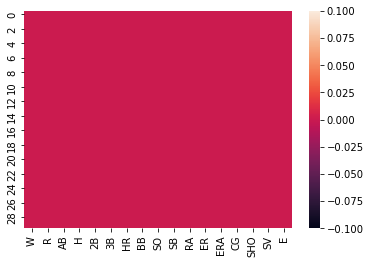

In [173]:
sns.heatmap(df.isnull())

We can observe that there is no missing values present in the data

In [174]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

We can see the unique values in each column and none of the data is categorical in nature

In [175]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

We can see that the data in output column is continuous and not categorical
* Below is the distribution of output data

<AxesSubplot:xlabel='W', ylabel='Count'>

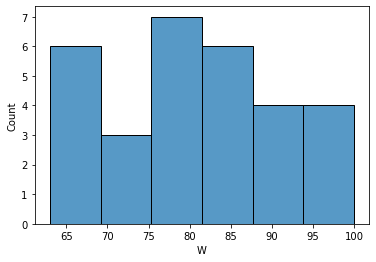

In [176]:
sns.histplot(df['W'])

* Output data has no skewness

<AxesSubplot:xlabel='W', ylabel='R'>

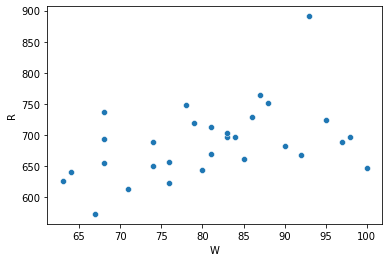

In [177]:
sns.scatterplot(x='W', y='R', data=df)

* Above graph tells us the relation between Runs and winning probability, Higher the runs - Higher the probability of winning the match

Let's see how W (Output) is related with other variables using scatter plot.

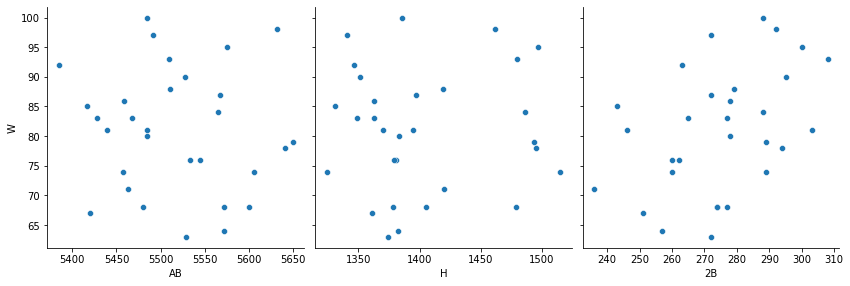

In [178]:
sns.pairplot(df, x_vars=['AB', 'H','2B'], y_vars='W', height=4, aspect=1, kind='scatter')
plt.show()

* With the above graph we can observe that At Bat and Hits data is too scattered and in case of Double the win win probability is slightly increasing with inscrease in 2B input 

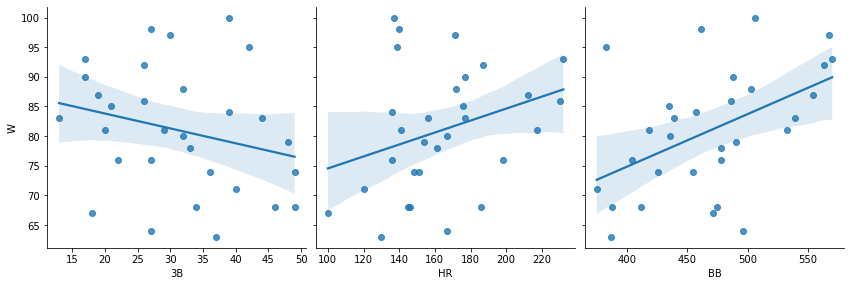

In [179]:
sns.pairplot(df, x_vars=['3B','HR','BB'], y_vars='W', height=4, aspect=1, kind='reg')
plt.show()

With the above graph we can observe that triple and Home runs data is too scattered and in case of Base on balls the win probability is slightly increasing with inscrease in BB input

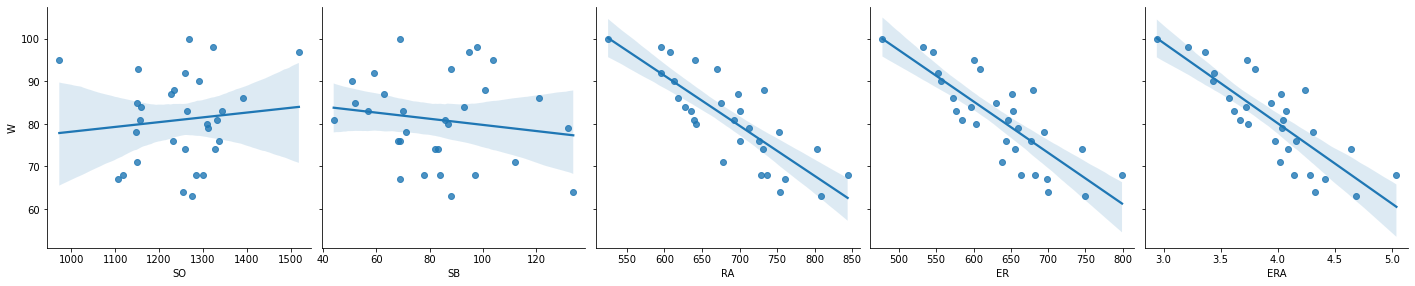

In [180]:
sns.pairplot(df, x_vars=['SO','SB','RA','ER','ERA'], y_vars='W', height=4, aspect=1, kind='reg')
plt.show()

From the above we can observe that
* Data is too scattered in SO (Strikeouts) and SB(Stolenbases) and doesn't tell any particular relation for winning case
* In case of RA(Runs allowed), ER(Earned runs), ERA(Earned runs average) the winning probability is decreasing with increase in input 

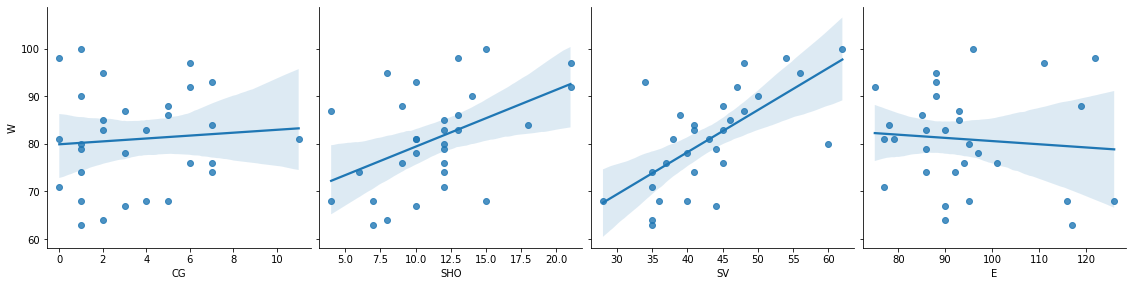

In [181]:
sns.pairplot(df, x_vars=['CG','SHO','SV','E'], y_vars='W', height=4, aspect=1, kind='reg')
plt.show()

* From the above plot We can only see the winning probability increasing with increase in SV(Save) input
* Slight increase is found in Win wrt to increase in SHO (Shoutout) 

In [182]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key observations :
* We can see that mean is greater than median (50th Percentile) in in the columns AB, H, HR, E and hence a slight skewness is present in the data
* We can observe higher gap between 75th percentile and max E, SV, R, SHO and ERA and hence outliers are present in those datas
* We can see that there is a high difference between mean and std in all the columns and we can say that the data is highly spreaded.

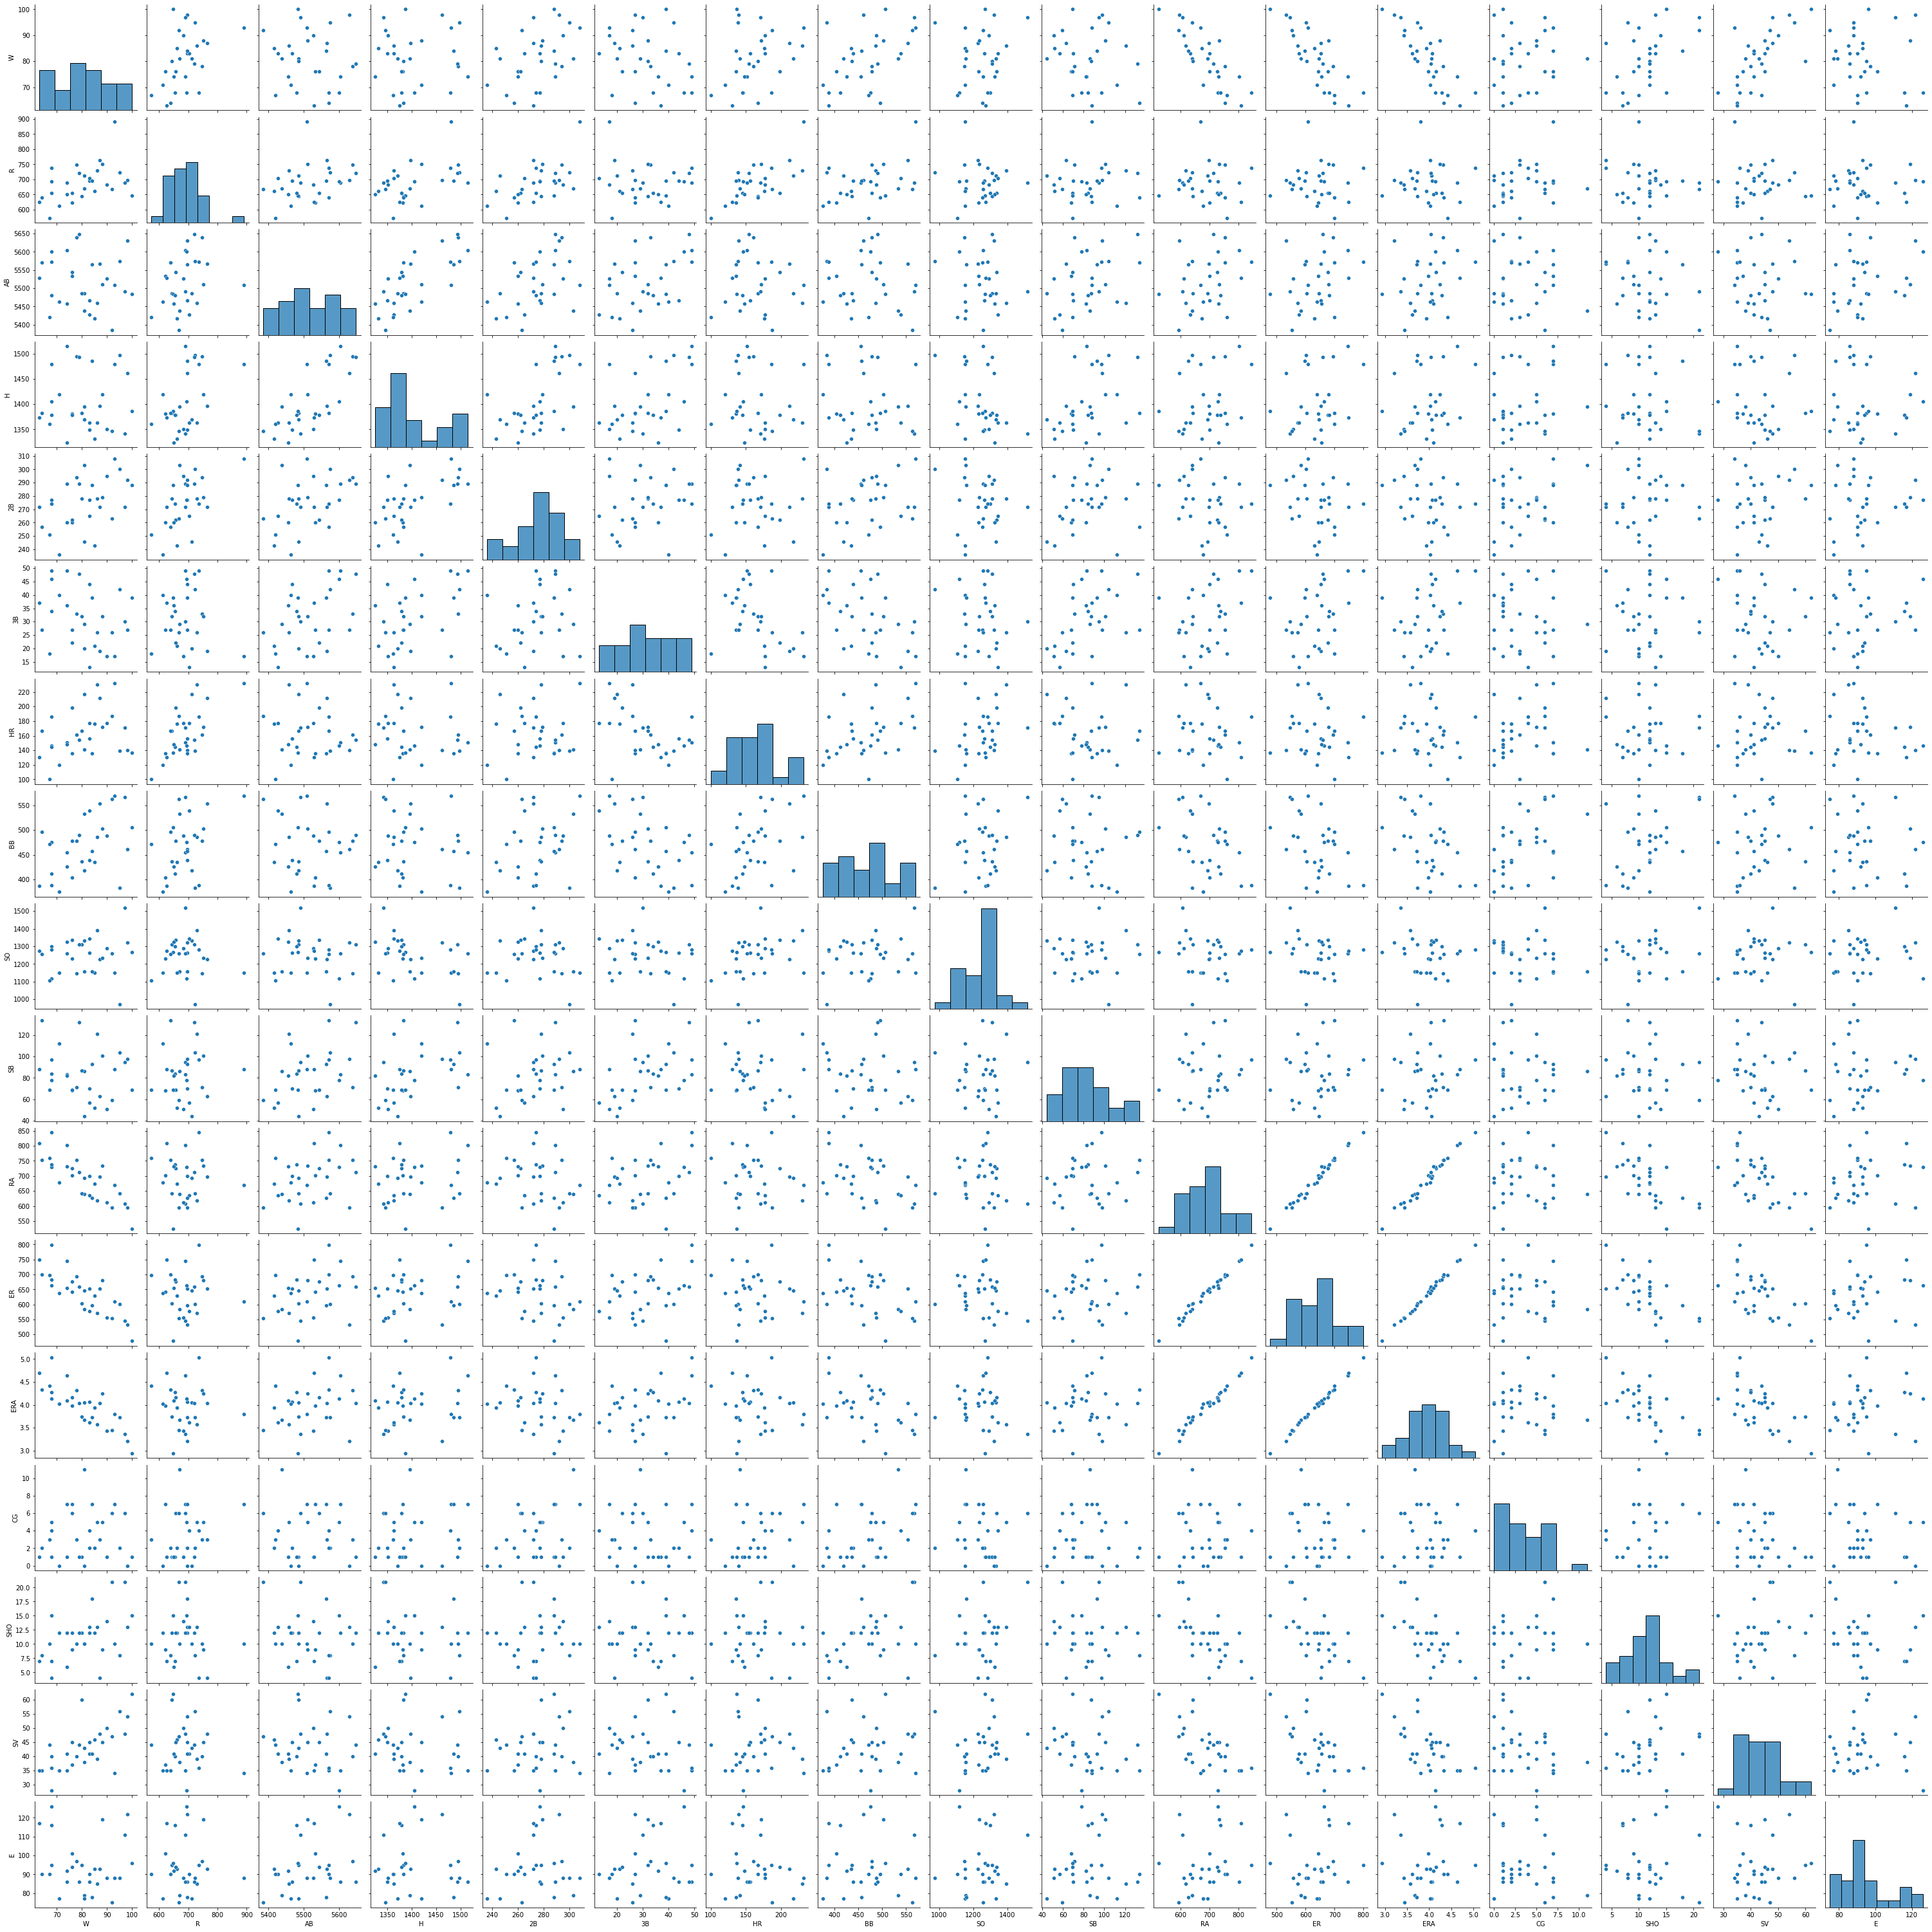

In [183]:
sns.pairplot(df)

Almost all the columns are normally distributed.Except R,SO,CG and E.

In [184]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

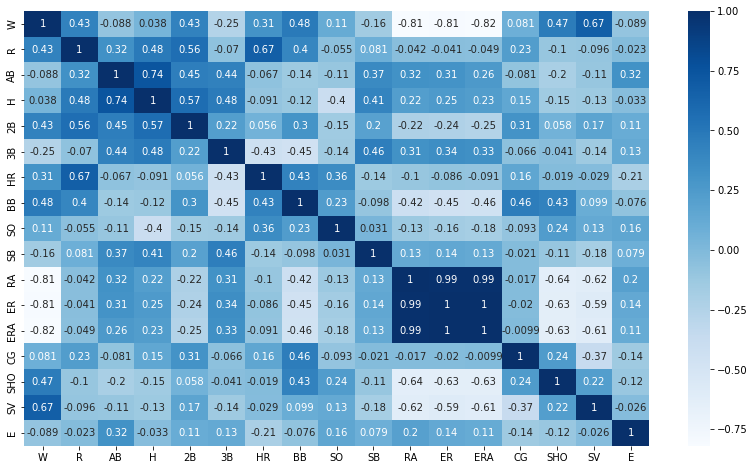

In [185]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

* Win (W) has highest correlation with SV with the value of 0.67
* Win (W) has negative correlations with the columns RA, ER and ERA
* The columns RA, ER and ERA are highly correlated with each others
* Win is moderately correlated with R, 2B, BB, SHO

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

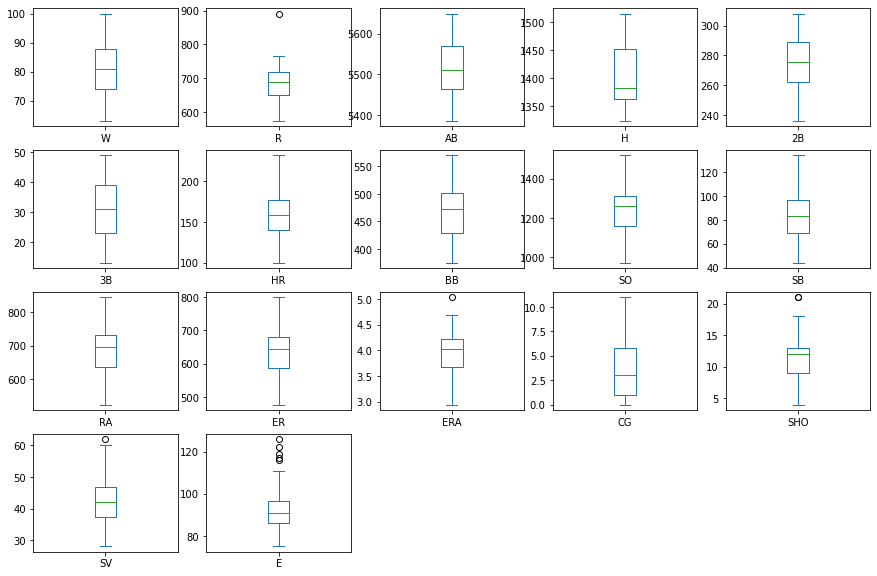

In [239]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [187]:
# To remove the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In [188]:
df_new.shape

(29, 17)

* There are 29 rows and 17 columns in new dataset after removing outliers.

In [189]:
df.shape

(30, 17)

* There are 30 rows and 17 columns in old datase.

In [190]:
# Now we can check for data loss

Dataloss = (((30-29)/30)*100)
Dataloss

3.3333333333333335

We can observe that dataloss in zscore method after removing outliers of 3.33% which is less than 10%

In [191]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [192]:
# we can observe that there is skewness present in the data in case of H,CG, SHO,SV, E and R

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [193]:
df_new[['E','SHO','SV','CG','R']] = scaler.fit_transform(df_new[['E','SHO','SV','CG','R']].values)

In [194]:
df_new.skew()

W      0.119013
R     -0.024842
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [195]:
# we can now scale the data using standard scaler
from sklearn.preprocessing import StandardScaler

In [196]:
x=df_new.iloc[:,1:]
x.sample()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,-1.308298,5533,1381,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818


In [197]:
#We can now check for multicolinearity

y=df_new.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [198]:
y.shape,x.shape

((29,), (29, 16))

In [199]:
scale=StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [202]:
vif_calc()

     VIF Factor Features
0      7.078392        R
1     20.431398       AB
2     10.167790        H
3      3.497354       2B
4      3.163348       3B
5      8.530815       HR
6      3.410513       BB
7      2.832205       SO
8      1.950309       SB
9    199.953199       RA
10  2139.787749       ER
11  1655.330503      ERA
12     2.926912       CG
13     3.309557      SHO
14     6.080860       SV
15     2.396334        E


* The table above tells that the columns RA, ER and ERA are causing multicolinearity with the highest values 17304.6, 59514.9, 29652.9, we can check for the column which is giving highest contibution to 'W' and drop rest of the columns.
* From df.corr() heatmap we can observe that RA and ER has same value of correlation of -0.81 with W and ERA has -0.82 value, hence we can drop off ER or RA (dropping ER)

In [203]:
x = x.drop(["ER"],axis=1)
x.shape

(29, 15)

In [204]:
vif_calc()

    VIF Factor Features
0     5.930061        R
1     7.683168       AB
2     9.418035        H
3     3.180065       2B
4     3.059812       3B
5     7.187047       HR
6     3.406865       BB
7     2.799153       SO
8     1.775007       SB
9   139.765891       RA
10  138.515668      ERA
11    2.545641       CG
12    3.179161      SHO
13    2.632904       SV
14    2.328477        E


Now we can observe that multicolinearity is been created between RA and ERA, We can drop ERA as its contribution to W is -0.82 only and RA contributes -0.81 which is higher than that of ERA

In [205]:
x = x.drop(["ERA"],axis=1)
x.shape

(29, 14)

In [206]:
vif_calc()

    VIF Factor Features
0     5.903475        R
1     5.267657       AB
2     8.001808        H
3     3.112162       2B
4     2.930053       3B
5     6.020368       HR
6     3.126193       BB
7     2.307214       SO
8     1.756773       SB
9     4.754302       RA
10    2.528484       CG
11    3.164232      SHO
12    2.606691       SV
13    2.290504        E


Hence the multicolinearity is removed from the data

In [207]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [208]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 14), (8, 14), (21,), (8,))

In [209]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()

In [210]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("r2 score :",r2_score(y_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

Score of  LinearRegression() is : 0.9263409290492395
r2 score : 0.8618991253535315
Errors of  LinearRegression() is
Mean absolute error : 3.576560209117778
Mean squared error : 15.182464906446132
Root mean squared error : 3.896468260674804


Score of  DecisionTreeRegressor() is : 1.0
r2 score : 0.12222853894258101
Errors of  DecisionTreeRegressor() is
Mean absolute error : 8.25
Mean squared error : 96.5
Root mean squared error : 9.82344135219425


Score of  KNeighborsRegressor() is : 0.7694693259727541
r2 score : 0.43226833428084144
Errors of  KNeighborsRegressor() is
Mean absolute error : 6.425000000000001
Mean squared error : 62.415
Root mean squared error : 7.900316449358216


Score of  SVR() is : 0.24236606268504202
r2 score : 0.05740467217541645
Errors of  SVR() is
Mean absolute error : 9.094013198937075
Mean squared error : 103.62657385271515
Root mean squared error : 10.179713839431596


Score of  Lasso() is : 0.8729550921736777
r2 score : 0.7403835021575146
Errors of  Lasso() i

*Comparing 6 models' score and r2 score Linear regression model had highest score and r2 score and lesser errors, so we can consider Linear regression model to be best of these 4 models
*Lasso is giving similar score but r2 score for Lasso is lesser than that of Linear regression model

WE can now try with Cross validationfor the models 

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')

score of  LinearRegression() is : [ -0.15223119  -1.73173045  -1.57149019   0.26385853 -10.8537081 ]
score mean of  LinearRegression() is : -2.8090602805298284
score std of  LinearRegression() is : 4.096587571872329


score of  DecisionTreeRegressor() is : [ 0.58254865 -0.35211268 -0.3013624  -0.25420376  0.57894737]
score mean of  DecisionTreeRegressor() is : 0.05076343724700294
score std of  DecisionTreeRegressor() is : 0.4338388030107024


score of  KNeighborsRegressor() is : [ 0.62002511  0.648       0.64172207  0.19414441 -0.12759949]
score mean of  KNeighborsRegressor() is : 0.3952584211305826
score std of  KNeighborsRegressor() is : 0.31272030223649755


score of  SVR() is : [ 0.07275004  0.14640093  0.10865225 -1.18313828 -1.53176129]
score mean of  SVR() is : -0.4774192698162107
score std of  SVR() is : 0.7273230555855699


score of  Lasso() is : [ 0.69332643 -0.04013425  0.94544728  0.19718953  0.87539963]
score mean of  Lasso() is : 0.5342457240578471
score std of  Lasso() i

Through CV we can see that the mean score is good for Lasso model but not better than that of Linear regression score without CV

In [213]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV

In [214]:
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}

In [215]:
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [216]:
grd.best_params_

{'criterion': 'friedman_mse'}

In [217]:
grd.best_score_

-0.10612427078586754

Checking for the performace of Ridge and Lasso

In [218]:
from sklearn.linear_model import Ridge,Lasso
param_alpha={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
gd=GridSearchCV(estimator=rd,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [219]:
gd.best_score_

-0.14531506965185093

In [220]:
gd.best_params_

{'alpha': 0.1}

Ridge is not giving a good score

In [221]:
param_alpha={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
ls=Lasso()
gd=GridSearchCV(estimator=ls,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [222]:
gd.best_score_

0.5342457240578471

In [223]:
gd.best_params_

{'alpha': 1}

In [224]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('Score:',ls.score(x_train,y_train)*100)

R2_Score: 74.03835021575146
Score: 87.29550921736777


We can observe that Lasss model with alpha value  is giving us the best score and r2 score as 87% and 74% respectively, hence Lasso can be considered as the final best model

Saving the model

In [225]:
ls.fit(x_train,y_train)

Lasso(alpha=1)

In [226]:
pred=ls.predict(x_test)
print("Score: ",ls.score(x_train,y_train)*100)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

Score:  87.29550921736777
R2_Score: 74.03835021575146
mean_squared_error: 28.54158873155824
mean_absolute_error: 4.480033980635829
RMSE value: 5.342432847641441


In [227]:
# We can save the model now
import joblib
joblib.dump(ls,'Baseball_casestudy_finalmodel.obj')

['Baseball_casestudy_finalmodel.obj']

Loading the saved model and predicting the values

In [228]:
Baseball_casestudy=joblib.load('Baseball_casestudy_finalmodel.obj')

In [229]:
pred=Baseball_casestudy.predict(x_test)
print("Predicted values :",pred)

Predicted values : [75.1846463  88.11386606 77.37138966 71.82938417 76.86569387 79.78899031
 75.16407731 88.94067535]


In [230]:
y_test

28    74
17    97
13    76
23    67
9     78
10    88
22    71
0     95
Name: W, dtype: int64

In [234]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred.round(2),'Original values':y_test})
df1

,Predicted values,Original values
28,75.18,74
17,88.11,97
13,77.37,76
23,71.83,67
9,76.87,78
10,79.79,88
22,75.16,71
0,88.94,95


We can observe that both predicted and original values to be almost near by